# Chapter 4 - Divide and Conquer with Python classes
<li>Create Classed in Python </li>
<li>Define __init__ method </li>
<li>Use self to refer to instance attributes and methods</li>


### Python module/package imports for this chapter

In [5]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

%matplotlib inline

from IPython.display import display, HTML


## Making Python classes

In [70]:
#Represents moving reptile, holds state, position, angle, pen position(does it leave a trail)
class Turtle(object):
    deg = math.pi / 180.0
    
    def __init__(self,terrarium): #initialize turtle object, pass in terrarium
        self.pos = (0,0)
        self.angle = 0
        self.pen = True
        
        self.axes = terrarium.axes
        
    #Class methods require self be passed
    def forward(self,distance): 
        #calculate distance to move forward
        posnew = (self.pos[0] + distance * math.cos(self.deg * self.angle),
                   self.pos[1] + distance * math.sin(self.deg * self.angle))
          
        if self.pen: # if pen is down draw
            line = pp.Line2D((self.pos[0],posnew[0]),(self.pos[1],posnew[1]))
            self.axes.add_line(line)
                             
        self.pos = posnew 
    
    #change angles
    def left(self,angle):
        self.angle = (self.angle + angle) % 360 #ensure angle is within 360degrees
            

    def right(self,angle):
        self.angle = (self.angle - angle) % 360

    #Put pen up or down to draw line behind
    def penup(self):
        self.pen = False
    
    def pendown(self):
        self.pen = True

    
#Holds the image we draw
class Terrarium(object):
    def __init__(self):
        self.fig = pp.figure(figsize=(3,3))
        self.axes = pp.axes()

        #remove x and y ticks
        self.axes.set_xticks([])
        self.axes.set_yticks([])

        #Change the opacity of the borders
        for spine in ['bottom','top','left','right']:
            self.axes.spines[spine].set_color('0.9')
        
        
    # crops to what has been drawn
    def rescale(self):
        self.axes.axis('scaled')

        xmin, xmax, ymin, ymax = self.axes.axis()
        dx = (xmax - xmin) / 50
        self.axes.axis([xmin-dx,xmax+dx,ymin-dx,ymax+dx])  

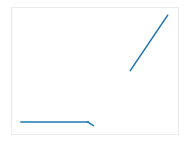

In [74]:
t = Terrarium()

turt = Turtle(t)

turt.forward(100)
turt.right(34)
turt.forward(10)
turt.left(90)

t.rescale()
turt.penup()
turt.forward(100)
turt.pendown()
turt.forward(100)
t.rescale()
